In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('Salary_dataset.csv')
data = data.drop(columns = ['Unnamed: 0'], axis =1)

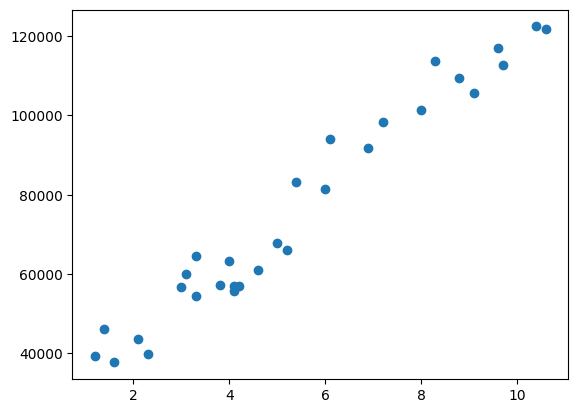

In [4]:
plt.scatter(data.YearsExperience, data.Salary)
plt.show()

In [6]:
data.YearsExperience.min() ,data.YearsExperience.max()

(np.float64(1.2000000000000002), np.float64(10.6))

### Implementation from scratch

11408.914790306986 11408.914790306986


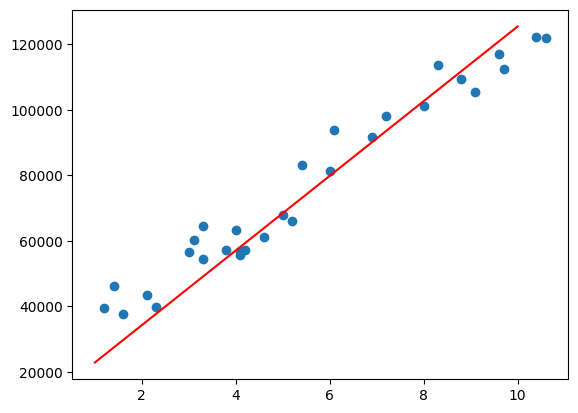

In [10]:
def gradient_descent(m_now, b_now, points,L):
    m_gradient = 0
    b_gradient = 0

    n = len(points)
    for i in range(n):
        x = points.iloc[i].YearsExperience
        y = points.iloc[i].Salary

        m_gradient += -(2/n)*x*(y- (m_now*x+b_now))
        b_gradient += -(2/n)*(y- (m_now*x+b_now))

    m = m_now - m_gradient *L
    b = b_now -b_gradient *L
    return m,b

L = 0.0001
epochs = 1000
m,b =0,0

for i in range(epochs):
    m,b = gradient_descent(m,b, data, L)

print(m,b)
plt.scatter(data.YearsExperience, data.Salary)
plt.plot(list(range(1,11)), [m * x + b for x in range(1,11)], color = 'red')


    
    

### Statsmodel implementation

In [12]:
import numpy as np
import statsmodels.api as sm



In [13]:
x = data.YearsExperience
y = data.Salary

x = sm.add_constant(x)

In [16]:
model = sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 24 Jul 2025   Prob (F-statistic):           1.14e-20
Time:                        20:57:25   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            2.485e+04   2306.654     10.772      0.000    2.01e+04    2.96e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Text(0.5, 1.0, 'Statsmodel Implementation')

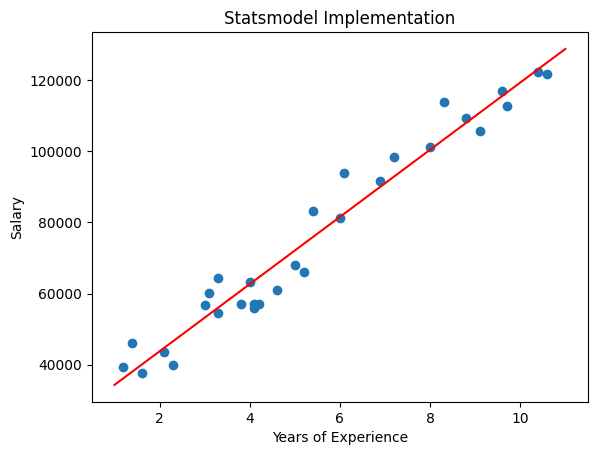

In [22]:
plt.scatter(data.YearsExperience,data.Salary)
plt.plot(list(range(1,12)), [9449.9623 * x + 2.485e+04	 for x in range(1,12)], color = 'red')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Statsmodel Implementation')



In [20]:
model.pvalues

const              1.816526e-11
YearsExperience    1.143068e-20
dtype: float64

### Implementation using sklearn

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

x = data[['YearsExperience']]
y = data.Salary
model = LinearRegression().fit(x,y)
print(model.coef_ , model.intercept_)

[9449.96232146] 24848.203966523193


YearsExperience    10.6
dtype: float64

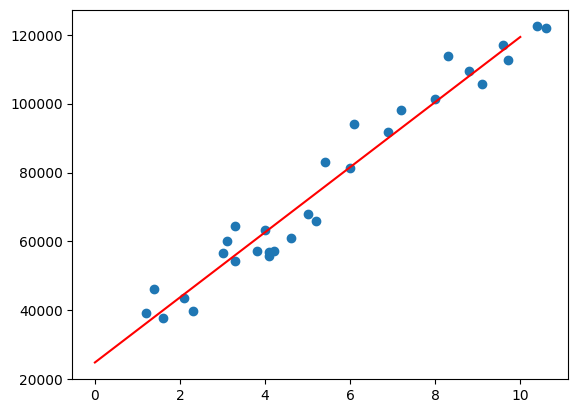

In [29]:
plt.scatter(x,y)
plt.plot(range(11), [9449.96*x+24848.20 for x in range(11)], color = 'red')

In [34]:
y_pred = model.predict(x)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
print(mse, rmse, r2)

31270951.722280953 5592.04360876066 0.9569566641435086


### Ridge Regularization (L2)

In [40]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha = 0.01)
ridge_model.fit(x,y)
y_pred = ridge_model.predict(x)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
print(mse, rmse, r2)

31270952.99670265 5592.043722710208 0.9569566623893131


### Lasso Regularization (L1)

In [43]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha = 0.01)
lasso_model.fit(x,y)
y_pred = lasso_model.predict(x)
mse = mean_squared_error(y, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y, y_pred)
print(mse, rmse, r2)

31270951.722293813 5592.043608761811 0.9569566641434909


In [45]:
0.9569566641434909 > 0.9569566623893131

True